 1) load the libarary 

In [89]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn modules & funcation
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


2)working with the iris dataset


In [90]:
x,y=datasets.load_iris(return_X_y=True,as_frame=True)
print(datasets.load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

3) describe the features 

In [91]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [92]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [93]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

4) visialise data befor apply modeling 

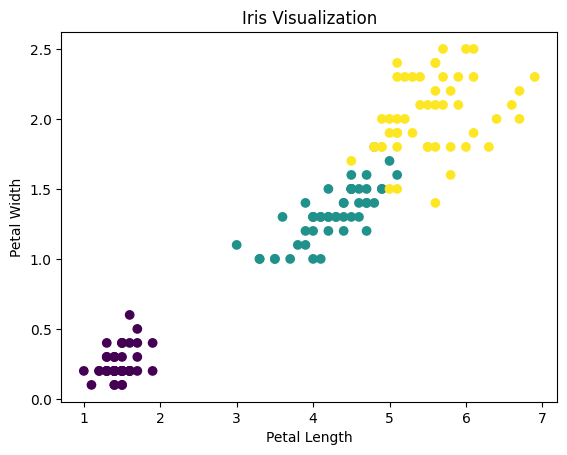

In [94]:
plt.figure()
plt.scatter(x.iloc[:,2], x.iloc[:,3], c=y)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Iris Visualization")
plt.show()

In [95]:
#selecting only two classes to logistic 
x = x[50:].reset_index(drop=True)
y = (y[50:] - 1).reset_index(drop=True)

all_variables = pd.concat([x, y], axis=1)

In [96]:
#collect the variables 
all_variables=pd.concat([x,y],axis=1)
all_variables.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


In [97]:
all_variables.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.494305
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.308080
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.786424
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.828129
target,0.494305,0.308080,0.786424,0.828129,1.000000


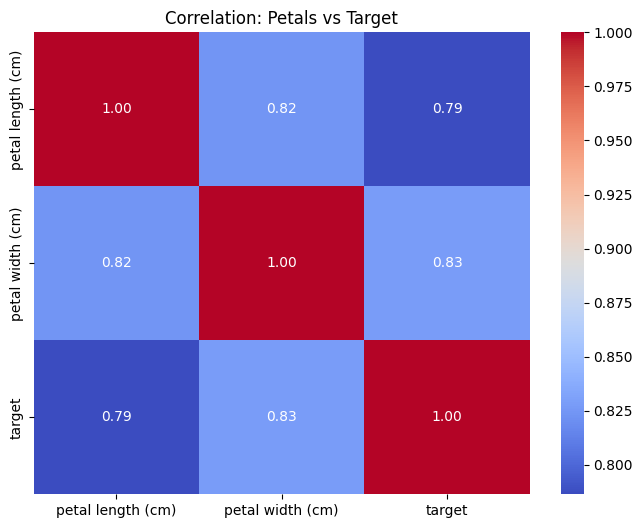

In [98]:


petal_target_cols = ['petal length (cm)', 'petal width (cm)', 'target']

petal_corr = all_variables[petal_target_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(petal_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation: Petals vs Target')
plt.show()

the imortant two atrribute efficete on data is sepal width and petal lenth 

so well show scatter (0,1)each target with differente widths

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

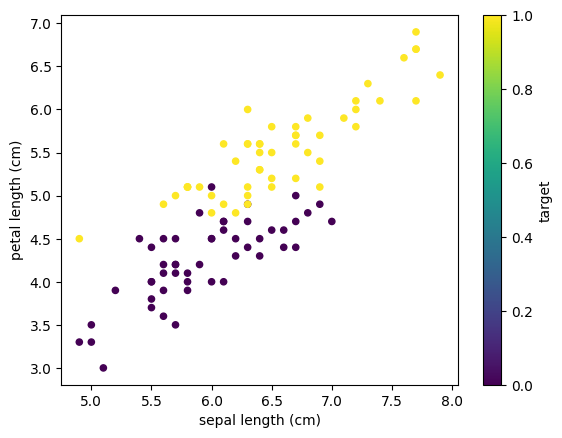

In [99]:
all_variables.plot.scatter(x='sepal length (cm)',y='petal length (cm)',c='target',colormap='viridis' )

### will appley the logistic model to classify iris without miscalssing 

In [100]:
#dividing up into traing sets and tessting sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [101]:
x_train.shape

(70, 4)

In [102]:
x_test.shape

(30, 4)

In [103]:
# importe logisticRegression
log_reg=LogisticRegression()

In [104]:
#fit model with data 
log_reg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [105]:
new_flower=[[6.5,2.8,7.1,1.5]]
log_reg.predict((new_flower))

c:\Users\Toshiba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [106]:
log_reg.predict_proba(new_flower)

c:\Users\Toshiba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.00379368, 0.99620632]])

In [107]:
y_pred=log_reg.predict(x_test)

In [108]:
#find accuracy for binary classification 
accuracy=sum(y_pred==y_test)/ len(y_test)
accuracy

0.9333333333333333

In [109]:
#accuracy from function sklearn 
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.9333333333333333

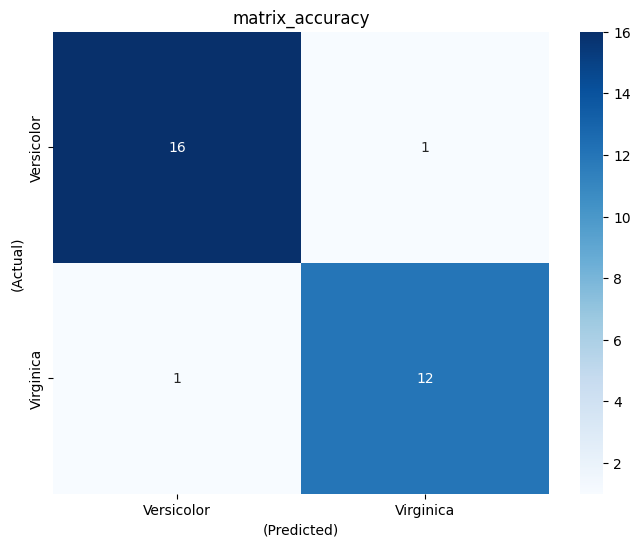

In [110]:
cm = confusion_matrix(y_test, y_pred)

# 2. بنرسمها كـ Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Versicolor', 'Virginica'], 
            yticklabels=[ 'Versicolor', 'Virginica'])

plt.xlabel('(Predicted)')
plt.ylabel('(Actual)')
plt.title('matrix_accuracy')
plt.show()

## will use decison tree

In [111]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [112]:
x_train.shape

(70, 4)

In [ ]:
y_pred_dt = dt_model.predict(x_test)


In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision tree accuracy :{acc_dt}")
print(f"logistic regression accuracy :{accuracy}")

0.7666666666666667
0.9333333333333333


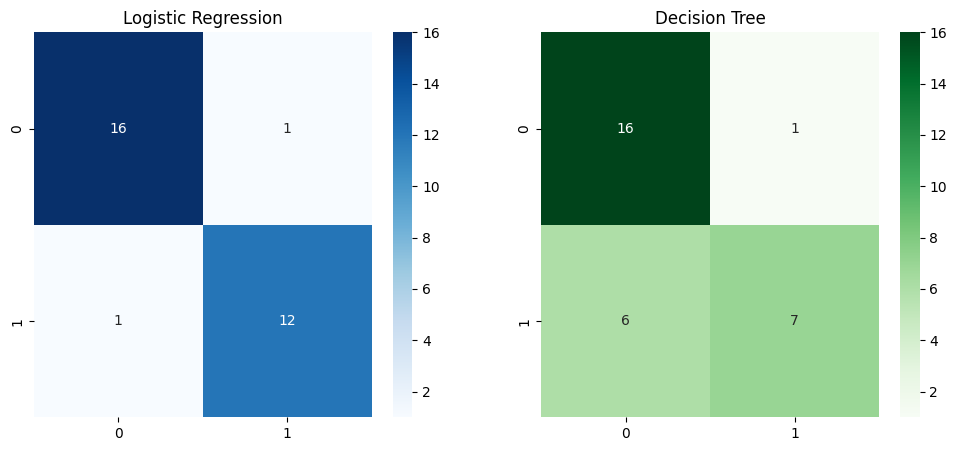

In [118]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

#(Logistic)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression')

#(Decision Tree)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Decision Tree')

plt.show()

### Gui for useablty 


In [122]:
import tkinter as tk
from tkinter import messagebox

def run_prediction():
    try:
        # 1. Get input from entry fields
        sl = float(entry_sl.get())
        sw = float(entry_sw.get())
        pl = float(entry_pl.get())
        pw = float(entry_pw.get())
        
        new_data = [[sl, sw, pl, pw]]
        
        # 2. Perform Predictions
        res_log = log_reg.predict(new_data)[0]
        res_dt = dt_model.predict(new_data)[0]
        
        # Map numerical labels to names
        species = {0: 'Versicolor', 1: 'Virginica'}
        
        # 3. Update Results in GUI
        label_log_result.config(text=f"Logistic Regression: {species[res_log]}", fg="#0056b3")
        label_dt_result.config(text=f"Decision Tree: {species[res_dt]}", fg="#28a745")
        
        # Check for disagreement
        if res_log != res_dt:
            messagebox.showwarning("Model Mismatch", "The models predicted different species for this input!")
            
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numbers in all fields.")

# --- GUI Window Setup ---
window = tk.Tk()
window.title("ML Model Comparison Tool")
window.geometry("400x500")
window.configure(padx=20, pady=20)

# Title Label
tk.Label(window, text="Iris Species Predictor", font=("Segoe UI", 16, "bold")).pack(pady=10)
tk.Label(window, text="Compare Logistic Regression vs Decision Tree", font=("Segoe UI", 9)).pack()

# Input Fields
field_labels = [("Sepal Length (cm)", "entry_sl"), ("Sepal Width (cm)", "entry_sw"), 
                ("Petal Length (cm)", "entry_pl"), ("Petal Width (cm)", "entry_pw")]

for label_text, var_name in field_labels:
    tk.Label(window, text=label_text, font=("Segoe UI", 10)).pack(pady=(10, 0))
    entry = tk.Entry(window, justify='center', font=("Segoe UI", 11))
    entry.pack(fill='x', pady=5)
    globals()[var_name] = entry 

# Predict Button
btn_predict = tk.Button(window, text="PREDICT SPECIES", command=run_prediction, 
                        bg="#f39c12", fg="white", font=("Segoe UI", 11, "bold"), height=2)
btn_predict.pack(fill='x', pady=20)

# Result Area
results_frame = tk.LabelFrame(window, text=" Prediction Results ", padx=10, pady=10)
results_frame.pack(fill='x')

label_log_result = tk.Label(results_frame, text="Logistic: --", font=("Segoe UI", 11))
label_log_result.pack(anchor='w')

label_dt_result = tk.Label(results_frame, text="Decision Tree: --", font=("Segoe UI", 11))
label_dt_result.pack(anchor='w')

window.mainloop()

c:\Users\Toshiba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Toshiba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Toshiba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Toshiba\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
